In [67]:
using LinearAlgebra

In [68]:
import Pkg; Pkg.add("Images")

   Resolving package versions...
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Manifest.toml`


In [69]:
import Pkg; Pkg.add("JLD")

   Resolving package versions...
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Manifest.toml`


In [70]:
using Images # read and show images, more info here: https://github.com/JuliaImages/Images.jl
using JLD # used for File I/O, more info here: https://github.com/JuliaIO/JLD.jl

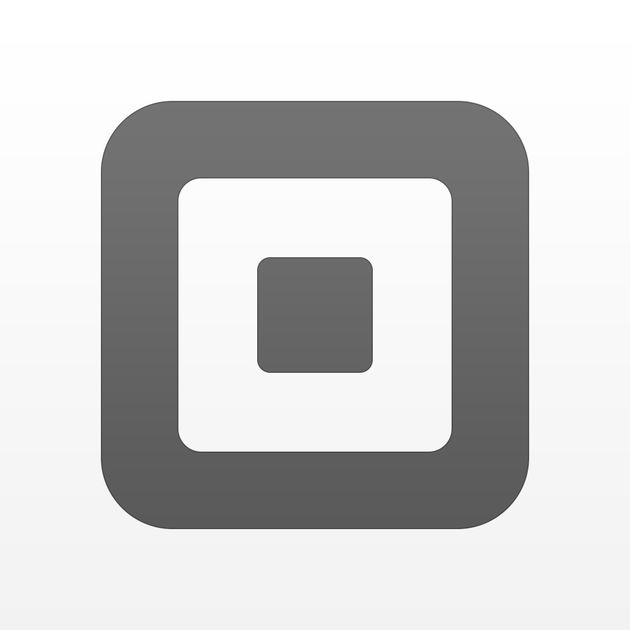

In [71]:
img = load("simples.jpg");
display(Gray.(img))
# Get image as a raw matrix
raw = channelview(Gray.(img[:,:]));

In [72]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m,n=size(A)
    A=1.0*A
    c=zeros(n,1)
    #for i=1:n
    #   c[i]=A[:,i]'*b/(b'*b)
    #end
    
    c=A'*(b/(b'*b))
    
    return c
end

melhores_coords (generic function with 1 method)

In [73]:
function jogo_vw(A)
    n,m=size(A)

    bv=randn(n,1)
    cv=randn(m,1)
    
    bw=randn(m,1)
    cw=randn(n,1)
    #errov=norm(A-bv*cv')
    #print(errov, "\n")
    
    for i=1:20
        cv=melhores_coords(A,bv)
        bw=cv
        cw=melhores_coords(A',bw)
        bv=cw
        
        #errow=norm(A'-bw*cw')
        #print(errow, "\n")
    end
    
    return bv,cv
end

jogo_vw (generic function with 1 method)

In [74]:
function compressão(A,nível)
    m,n=size(A)
    B=zeros(m,nível)
    C=zeros(n,nível)
    
    for i=1:nível
        B[:,i],C[:,i]=jogo_vw(A)
        A=A-B[:,i]*C[:,i]'
    end
    return B,C
end

compressão (generic function with 1 method)

In [75]:
B,C=compressão(raw,3)

([22.26452573867177 -27.480714612795005 3.429817338078125; 22.26452573867177 -27.480714612795005 3.429817338078125; … ; 21.12947148532772 -26.07973700508385 3.2549639051564996; 21.12947148532772 -26.07973700508385 3.2549639051564996], [0.05173170436404173 0.00589601163014142 0.004538016943908604; 0.05173170436404173 0.00589601163014142 0.004538016943908604; … ; 0.05173170436404175 0.005896011630141421 0.004538016943908604; 0.05173170436404175 0.005896011630141421 0.004538016943908604])

In [76]:
teste=B*C'

630×630 Matrix{Float64}:
 1.00532   1.00532   1.00532   1.00532   …  1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532   …  1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532   …  1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 1.00532   1.00532   1.00532   1.00532      1.00532   1.00532   1.00532
 ⋮                                     

In [77]:
rank(teste)

3

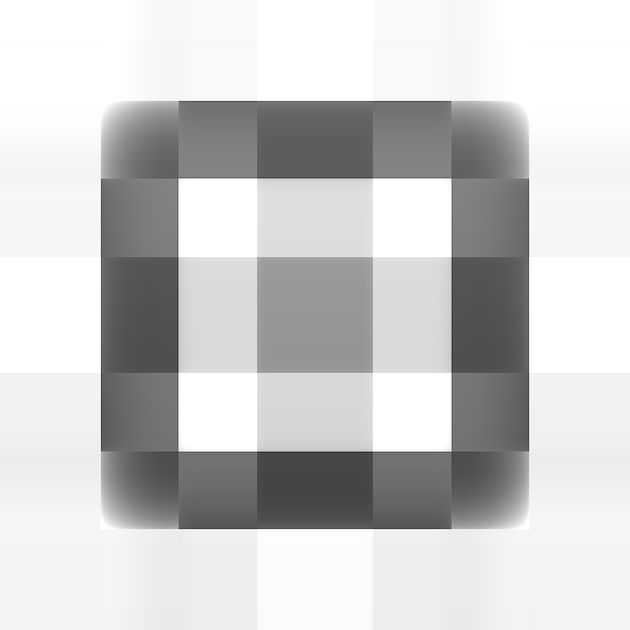

In [78]:
display(Gray.(teste))